# **<ins style="color:aqua">Handling Missing Data</ins>**
## **<b style="color:green">Random Sample Imputation</b>**
- Using __Random Simple Imputation__ can fill Numerical, and Categorical Data both.
- __Missing Indicator__
- __Automatic Selection of Prameter__

### <b style="color:blue">__Random Imputation__</b>
- Select a random number from the available data in same column.
- It can be applied on both _Numerical_ as well as _Categorical_ columns.
- It is easy to apply. It can not be done using __Sklearn__. It can be done using __pandas__.
- __Variance__ does not change.
- It does not work good with __DecisionTree algorithms__ models.
- It work good with __Linear algorithms__ models.
- It may change __Co-variance__ of data.
- It consume more memory to use.
- No effect on outliers

### <b style="color:red">Numerical Data</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/csvData/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.sample(7)

,Survived,Age,Fare
568,0,NaN,7.2292
65,1,NaN,15.2458
227,0,20.50,7.2500
644,1,0.75,19.2583
247,1,24.00,14.5000
386,0,1.00,46.9000
512,1,36.00,26.2875


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X.shape, y.shape

((891, 2), (891,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, y_train.shape

((712, 2), (712,))

In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train.sample(7)

,Age,Fare,Age_imputed
464,NaN,8.0500,NaN
432,42.0,26.0000,42.0
598,NaN,7.2250,NaN
176,NaN,25.4667,NaN
661,40.0,7.2250,40.0
774,54.0,23.0000,54.0
111,14.5,14.4542,14.5


In [8]:
X_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [9]:
(X_train['Age_imputed'][X_train['Age_imputed'].isnull()]).sample(20)

497   NaN
669   NaN
229   NaN
87    NaN
552   NaN
324   NaN
495   NaN
301   NaN
533   NaN
464   NaN
367   NaN
354   NaN
241   NaN
648   NaN
303   NaN
868   NaN
82    NaN
560   NaN
859   NaN
490   NaN
Name: Age_imputed, dtype: float64

In [10]:
X_train['Age_imputed'].dropna()

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
360    40.0
75     25.0
299    50.0
534    30.0
493    71.0
Name: Age_imputed, Length: 564, dtype: float64

In [11]:
# get random values from available data
X_train['Age_imputed'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24. , 34. , 29. , 11. , 71. , 30. , 52. ,  2. , 33. , 23. ,  7. ,
       22. , 29. , 22. , 36. , 28. , 33. , 35. , 52. , 33. , 16. , 26. ,
       24. , 45.5, 56. , 23. , 32. , 36.5, 56. , 58. , 35. , 42. ,  4. ,
       25. , 24. , 30. , 29. , 30. , 40. , 41. , 34. ,  2. , 36. , 16. ,
       16. , 48. , 28. , 22. , 14. , 24. , 34. , 18. , 17. , 57. , 17. ,
       22. , 32. , 24. , 34. , 24. , 30. , 37. , 24. , 42. , 56. , 32. ,
       61. , 27. , 48. , 24. , 24. , 29. , 47. , 25. , 60. , 27. , 25. ,
       25. , 36. , 45. , 40. , 30. ,  8. , 29. , 24. , 43. , 16. , 39. ,
       20. , 44. , 15. , 45. , 24. , 32. , 19. , 42. , 31. , 54. , 36. ,
       51. ,  3. , 59. , 32.5, 45. , 19. , 26. , 31. , 28. , 14. , 17. ,
       23. , 42. , 32. , 28. , 49. , 20. , 25. ,  2. , 16. , 39. , 30. ,
       25. , 21. , 32. , 34. , 41. , 23. , 21. , 36. ,  5. , 26. , 63. ,
       16. , 34. , 40. , 24. , 24. , 45. , 44. , 30. , 29. ,  9. , 45. ,
       31. , 43. , 24. , 36. , 32. ])

In [12]:
# fill random data from available data in same column
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age_imputed'].dropna().sample(X_train['Age'].isnull().sum())
X_train.sample(7)

,Age,Fare,Age_imputed
6,54.0,51.8625,54.0
583,36.0,40.1250,36.0
202,34.0,6.4958,34.0
884,25.0,7.0500,25.0
237,8.0,26.2500,8.0
123,32.5,13.0000,32.5
686,14.0,39.6875,14.0


In [13]:
# fill random data from available data in same column
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age_imputed'].dropna().sample(X_test['Age'].isnull().sum()).values
X_test.sample(7)

,Age,Fare,Age_imputed
777,5.0,12.4750,5.0
468,NaN,7.7250,35.0
473,23.0,13.7917,23.0
830,15.0,14.4542,15.0
721,17.0,7.0542,17.0
712,48.0,52.0000,48.0
726,30.0,21.0000,30.0


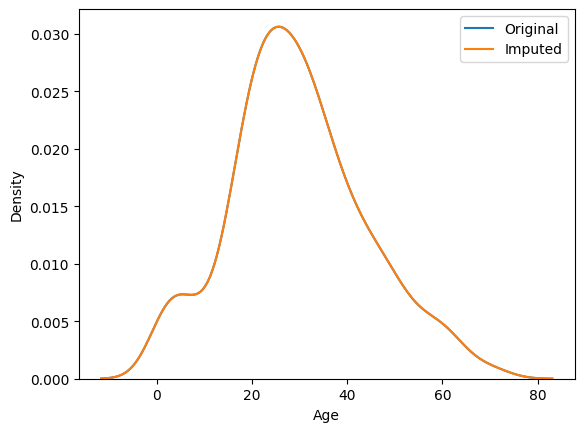

In [14]:
sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()

In [15]:
# variance of column Age
X_train['Age'].var(), X_train['Age_imputed'].var()


(204.34951339046142, 204.34951339046142)

In [16]:
# covariance of column Age and Fare
X_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,71.512440
Age_imputed,204.349513,71.512440,204.349513


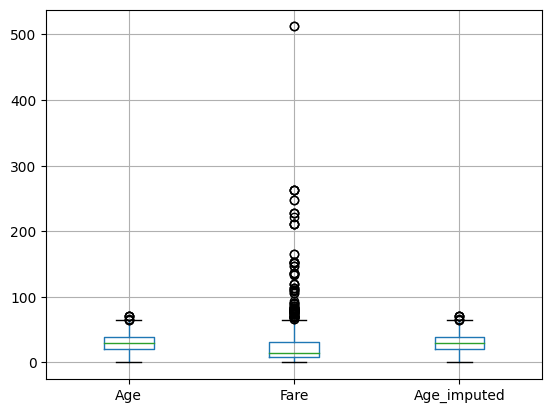

In [17]:
# outliers of data
X_train.boxplot()
plt.show()

In [18]:
# random test observation
observation = df.iloc[7, :]
sample_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
# random_state=constant : fix the constant prediction for the same observation
sample_value

703    25.0
Name: Age, dtype: float64

### <b style="color:red">Categorical Data</b>

In [19]:
dfn = pd.read_csv("../data/housingDataSet.csv", usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
dfn.sample(7)

,FireplaceQu,GarageQual,SalePrice
66,Gd,TA,180000
254,NaN,TA,145000
1080,NaN,TA,145000
1099,TA,TA,157000
1310,TA,TA,335000
279,TA,TA,192000
262,TA,TA,151000


In [20]:
dfn.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
X = dfn
y = dfn['SalePrice']

In [22]:
X.head(5)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((1168, 3), (292, 3))

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(7)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
669,Gd,TA,137500,TA,Gd
578,NaN,TA,146000,TA,NaN
52,NaN,TA,110000,TA,NaN
36,NaN,TA,145000,TA,NaN
796,TA,TA,143500,TA,TA
1087,Gd,TA,252000,TA,Gd
710,NaN,NaN,52000,NaN,NaN


In [27]:
X_train.nunique()

FireplaceQu              5
GarageQual               5
SalePrice              572
GarageQual_imputed       5
FireplaceQu_imputed      5
dtype: int64

In [28]:
X_train.shape

(1168, 5)

In [29]:
X_train.isnull().sum()

FireplaceQu            557
GarageQual              65
SalePrice                0
GarageQual_imputed      65
FireplaceQu_imputed    557
dtype: int64

In [30]:
X_train['GarageQual'].isnull().sum()

65

In [31]:
# get random value from the available dataset of same column
X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

array(['TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA', 'TA', 'TA',
       'Gd', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA',
       'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA', 'TA'],
      dtype=object)

In [32]:
# fill random value
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\kumar\AppData\Local\Temp\ipykernel_4504\3546763038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\kumar\AppData\Local\Temp\ipykernel_4504\3546763038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


In [33]:
# fill the NaN value
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\kumar\AppData\Local\Temp\ipykernel_4504\654039729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
C:\Users\kumar\AppData\Local\Temp\ipykernel_4504\654039729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


In [34]:
X_train.sample(7)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1112,NaN,TA,129900,TA,Gd
906,Gd,TA,255000,TA,Gd
1204,NaN,TA,153500,TA,TA
1020,NaN,TA,176000,TA,TA
381,Gd,TA,187750,TA,Gd
478,Gd,TA,297000,TA,Gd
1053,Gd,TA,144500,TA,Gd


In [35]:
X_train.isnull().sum()

FireplaceQu            557
GarageQual              65
SalePrice                0
GarageQual_imputed       0
FireplaceQu_imputed      0
dtype: int64

In [36]:
X_train['GarageQual'].value_counts()

GarageQual
TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: count, dtype: int64

In [37]:
len(X_train['GarageQual'].dropna())

1103

In [38]:
X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna())

GarageQual
TA    0.951043
Fa    0.037171
Gd    0.009973
Po    0.000907
Ex    0.000907
Name: count, dtype: float64

In [39]:
len(X_train)

1168

In [40]:
X_train['GarageQual_imputed'].value_counts() / len(X_train)

GarageQual_imputed
TA    0.952911
Fa    0.035959
Gd    0.009418
Po    0.000856
Ex    0.000856
Name: count, dtype: float64

In [41]:
# frequency of columns
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [42]:
# frequency
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.645342
TA,0.412439,0.544332
Fa,0.040917,0.053872
Po,0.027823,0.034792
Ex,0.024550,0.032548


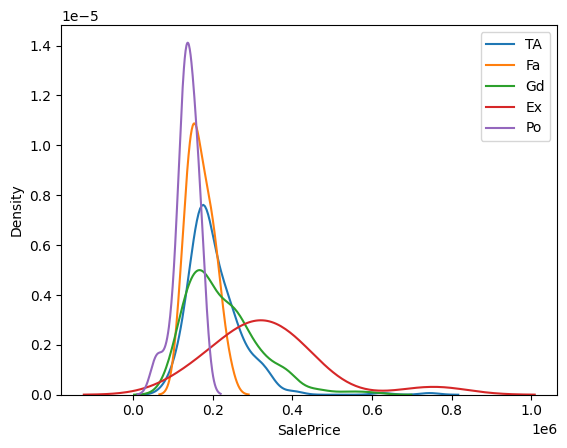

In [43]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()

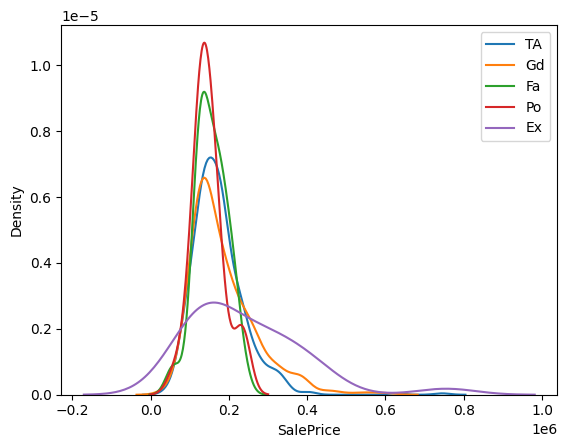

In [44]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()